In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from pycqed import *
from pycqed.util import *

# Josephson Phase-Slip Qubit Example

The JPSQ is a new type of qubit that exploits interference effects between fluxon tunneling amplitudes to linearly tune the transverse field by way of a gate electrode. With this circuit it becomes possible to fully emulate a spin-half. If such a qubit can be successfully realised it is understood that quantum annealing hardware can be used to emulate spin systems beyond the simple transverse Ising model.

## Two Junction SQUID

We first look at the device described by [Friedman and Averin](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.88.050403) to investigate the suppression of macroscopic tunnelling by the Aharonov-Casher effect.

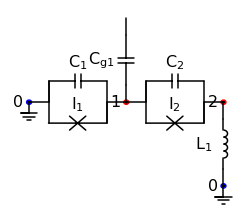

In [2]:
circuit = CircuitSpec("JPSQ Circuit")
circuit.addBranch(["C1","I1"],'right',0,False)
circuit.addBranch(["C2","I2"],'right',1,False)
circuit.addBranch(["L1"],'down',2,True,lead_len=1.0)
circuit.addChargeBias('up',1,lead_len=1.0)
circuit.drawCircuit(inline=True)

In [3]:
circuit.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(e^{i\phi_{12e}}*D_{1}*D^{\dagger}_{2} + conjugate(e^{i\phi_{12e}})*D^{\dagger}_{1}*D_{2}) + (0.5*C_{2}*Q_{2}/(-C_{2}**2 + C_{2}*(C_{1} + C_{2} + C_{g1})) + 0.5*C_{2}*(Q_{1e} + Q_{1})/(-C_{2}**2 + C_{2}*(C_{1} + C_{2} + C_{g1})))*(Q_{1e} + Q_{1}) + (0.5*C_{2}*(Q_{1e} + Q_{1})/(-C_{2}**2 + C_{2}*(C_{1} + C_{2} + C_{g1})) + 0.5*(C_{1} + C_{2} + C_{g1})*Q_{2}/(-C_{2}**2 + C_{2}*(C_{1} + C_{2} + C_{g1})))*Q_{2} + 0.5*\Phi_{2}**2/L_{1}]])

In [4]:
h = HamilSpec(circuit)
h.setTruncation(1,10,"charge")
h.setTruncation(2,10,"charge")
h.prepareOperators()
h.getHilbertSpaceSize()

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


441

In [5]:
h.getParameterNames()

['C1', 'I1', 'C2', 'I2', 'L1', 'Cg1', 'phi12e', 'Q1e']

In [6]:
Ca = 60 # fF/um^2
Jc = 3  # uA/um^2
Aj = 0.3**2 # um^2
h.setParameterValues(
    'C1', Ca*Aj,
    'C2', Ca*Aj,
    'I1', Jc*Aj,
    'I2', Jc*Aj,
    'L1', 100.0,
    'Cg1', 2.0,
    'phi12e', 0.0,
    'Q1e', 0.0
)

spec = [
    h.sweepSpec('phi12e',0.0,1.0,101)
]
sweep = h.paramSweep(spec)

Text(0, 0.5, '$E_{g,i}$ (GHz)')

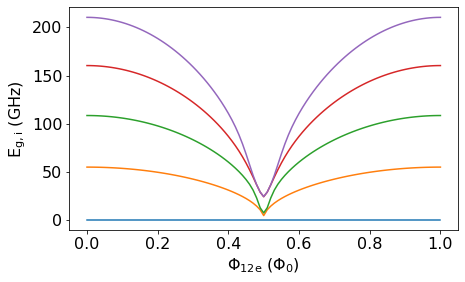

In [7]:
x,sweep_p,v = h.getSweep(sweep,'phi12e',{})
for i in range(5):
    y = sweep_p[i] - sweep_p[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{12e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

In [8]:
h.setParameterValues(
    'phi12e', 0.5,
    'Q1e', 0.0
)

spec = [
    h.sweepSpec('Q1e',0.0,1.0,101)
]
sweep = h.paramSweep(spec)

Text(0, 0.5, '$E_{g,i}$ (GHz)')

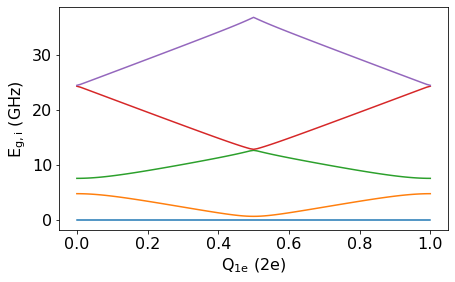

In [9]:
x,sweep_q,v = h.getSweep(sweep,'Q1e',{})
for i in range(5):
    y = sweep_q[i] - sweep_q[0]
    plt.plot(x,y)
plt.xlabel("$Q_{1e}$ ($2e$)")
plt.ylabel("$E_{g,i}$ (GHz)")

In this device, a finite gate capacitance, that is required in a real device to induce an offset charge, actually lifts the interference effect to some extent. We can observe this by sweeping the capacitance:

In [10]:
h.setParameterValues(
    'phi12e', 0.5,
    'Q1e', 0.5
)

spec = [
    h.sweepSpec('Cg1',0.0,10.0,101)
]
sweep = h.paramSweep(spec)

Text(0, 0.5, '$E_{g,i}$ (GHz)')

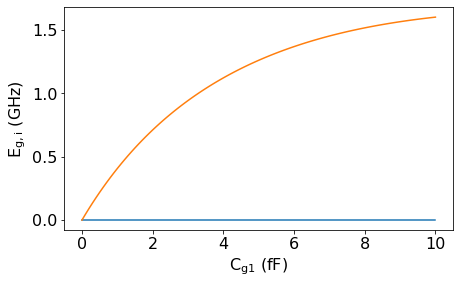

In [11]:
x,sweep_c,v = h.getSweep(sweep,'Cg1',{})
for i in range(2):
    y = sweep_c[i] - sweep_c[0]
    plt.plot(x,y)
plt.xlabel("$C_{g1}$ (fF)")
plt.ylabel("$E_{g,i}$ (GHz)")

## Grounded 4-JJ JPSQ

This Josephson Phase-Slip Qubit (JPSQ) circuit builds on the lessons learnt from the 3-JJ qubit, where large JJs are used as large inductors. However the smaller junction is now replaced with two junctions in series, that are possibly much larger than the other two, in between which is a very small island with a small self-capacitance. Furthermore, this design doesn't suffer from the incomplete interference caused by a finite gate capacitance.

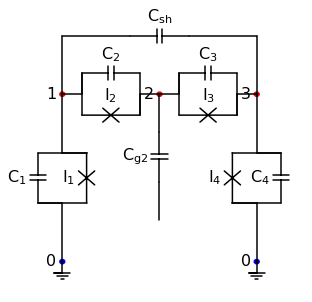

In [12]:
circuit = CircuitSpec("JPSQ Circuit")
circuit.addBranch(["C1","I1"],'up',0,False,lead_len=2.0)
circuit.addBranch(["C2","I2"],'right',1,False)
circuit.addBranch(["C3","I3"],'right',2,False)
circuit.addBranch(["C4","I4"],'down',3,True,lead_len=2.0)
circuit.addBranch(["Csh"],'right',1,False,lead_len=2.0,arm_len=0.7)
circuit.addChargeBias('down',2,lead_len=1.5)
circuit.drawCircuit(inline=True)

/home/dustyd/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dustyd/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


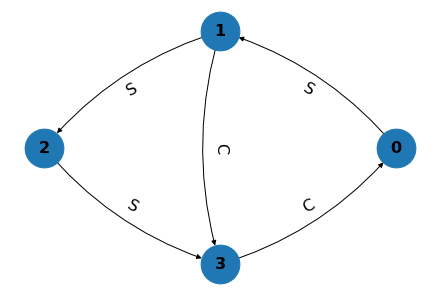

In [13]:
circuit.drawGraph(inline=True,connectionstyle='arc3,rad=0.15')

In [14]:
circuit.showCircuitStats()

Total Component Count:
  Capacitors: 6
  Inductors: 0
  Josephson Junctions: 4
  Mutual Inductances: 0

Graph Properties:
  Nodes: 4
  Edges: 5
  Spanning Branches: 3
  Closure Branches: 2

Circuit Properties:
  Irreducible Loops: 2
  Superconducting Loops: 1
  Flux Bias Lines: 1
  Charge Bias Lines: 1


In [16]:
circuit.getQuantumJosephsonEnergies()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(1.0*D^{\dagger}_{1}*D_{2} + 1.0*D_{1}*D^{\dagger}_{2}) - 0.5*I_{3}*(1.0*D^{\dagger}_{2}*D_{3} + 1.0*D_{2}*D^{\dagger}_{3}) - 0.5*I_{4}*(e^{i\phi_{30e}}*D_{3} + conjugate(e^{i\phi_{30e}})*D^{\dagger}_{3})]])

Now we choose an initial truncation for each degree of freedom:

In [17]:
h = HamilSpec(circuit)
h.setTruncation(1,5,"charge")
h.setTruncation(2,12,"charge")
h.setTruncation(3,5,"charge")
h.prepareOperators()
h.getHilbertSpaceSize()

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


3025

Let's now check what parameters are required for the sparse eigensolver:

In [18]:
h.getParameterNames()

['C1', 'I1', 'C2', 'I2', 'C3', 'I3', 'C4', 'I4', 'Csh', 'Cg2', 'phi30e', 'Q2e']

In [19]:
Ca = 60 # fF/um^2
Jc = 3  # uA/um^2
Aj = 0.3**2 # um^2
alpha = 10.0
h.setParameterValues(
    'C1',Ca*Aj,
    'C2',Ca*Aj*alpha,
    'C3',Ca*Aj*alpha,
    'C4',Ca*Aj,
    'I1',Jc*Aj,
    'I2',Jc*Aj*alpha,
    'I3',Jc*Aj*alpha,
    'I4',Jc*Aj,
    'Cg2',5.0,
    'Csh',100.0,
    'phi30e',0.0,
    'Q2e',0.0
)

In [20]:
h.substitute({})
H = h.getHamiltonian()
print ("Hamiltonian Sparsity: %f" % h.sparsity(H))

Hamiltonian Sparsity: 0.997313


The sparsity is indeed very high thus a sparse eigensolver is justified, now we look at the required value of $\sigma$:

In [21]:
h.params.setParameterValues('phi30e',0.5,'Q2e',0.0)
h.substitute({})
H = h.getHamiltonian()
E = H.eigenenergies()
print (E[0])
print (E[1]-E[0])

h.params.setParameterValues('phi30e',0.0,'Q2e',0.0)
h.substitute({})
H = h.getHamiltonian()
E = H.eigenenergies()
print (E[0])
print (E[1]-E[0])

-2590.268492423569
2.5530151331777233
-2817.82675135638
48.707611247379646


## Flux Dependence of the Energy

Let's now look at the lowest eigenvalues as a function of externally applied flux, first when there is no charge on the island:

In [24]:
spec = [
    h.sweepSpec('phi30e',0.0,1.0,101)
]
h.params.setParameterValue('Q2e',0.0)

# Configure diagonalizer
opts = {"sigma":-2820,"mode":"normal","maxiter":None,"tol":0}
h.setDiagConfig(sparse=True, sparsesolveropts=opts)

# Do the sweep
sweep = h.paramSweep(spec, timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.536 s
  Loop duration:	67.504 s
  Avg iteration:	0.668 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

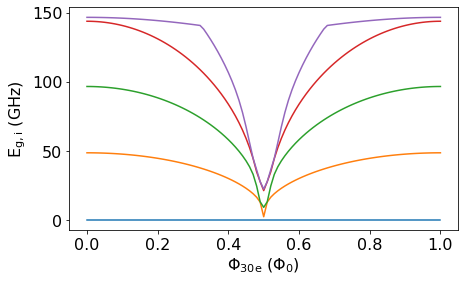

In [25]:
x,sweep_p,v = h.getSweep(sweep,'phi30e',{})
for i in range(5):
    y = sweep_p[i] - sweep_p[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{30e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

Now let's look at the spectra when there is half a Cooper-pair's worth of offset charge on the island:

In [26]:
spec = [
    h.sweepSpec('phi30e',0.0,1.0,101)
]
h.setParameterValue('Q2e',0.5)

sweep = h.paramSweep(spec, timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.562 s
  Loop duration:	73.689 s
  Avg iteration:	0.730 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

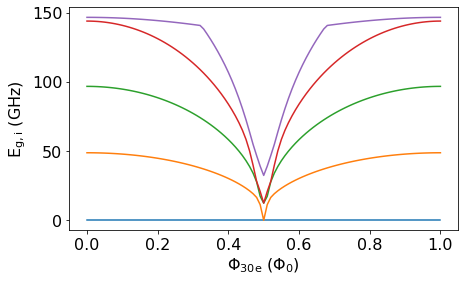

In [27]:
x,sweep_p,v = h.getSweep(sweep, 'phi30e', {})
for i in range(5):
    y = sweep_p[i] - sweep_p[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{30e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

### Charge Dependence of the Energy

Now we sweep the charge offset applied to the island:

In [28]:
spec = [
    h.sweepSpec('Q2e',0.0,1.0,101)
]
h.setParameterValue('phi30e', 0.5)
sweep = h.paramSweep(spec, timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.629 s
  Loop duration:	92.700 s
  Avg iteration:	0.918 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

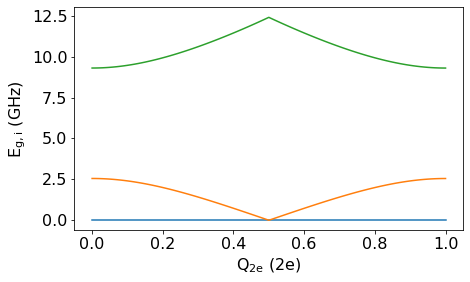

In [33]:
x,sweep_q,v = h.getSweep(sweep, 'Q2e', {})
for i in range(3):
    y = sweep_q[i] - sweep_q[0]
    plt.plot(x,y)
plt.xlabel("$Q_{2e}$ ($2e$)")
plt.ylabel("$E_{g,i}$ (GHz)")

### Island Self-Capacitance

Now we vary the capacitance of the charging island:

In [34]:
spec = [
    h.sweepSpec('Cg2',0.0,100.0,101)
]
h.setParameterValues('phi30e',0.5,'Q2e',0.0)
sweep = h.paramSweep(spec, timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.518 s
  Loop duration:	113.579 s
  Avg iteration:	1.125 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

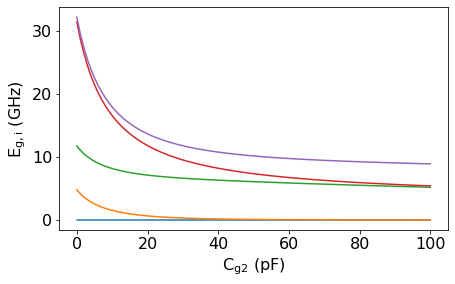

In [35]:
x,sweep_c,v = h.getSweep(sweep,'Cg2',{})
for i in range(5):
    y = sweep_c[i] - sweep_c[0]
    plt.plot(x,y)
plt.xlabel("$C_{g2}$ (pF)")
plt.ylabel("$E_{g,i}$ (GHz)")

### Shunt Capacitor Across Both Junctions

Now we look at the dependence of the minimum gap on the shunt capacitor:

In [36]:
spec = [
    h.sweepSpec('Csh',0.0,100.0,101)
]
h.setParameterValues('phi30e',0.5,'Q2e',0.0,'Cg2',20.0)
sweep = h.paramSweep(spec, timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.636 s
  Loop duration:	98.889 s
  Avg iteration:	0.979 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

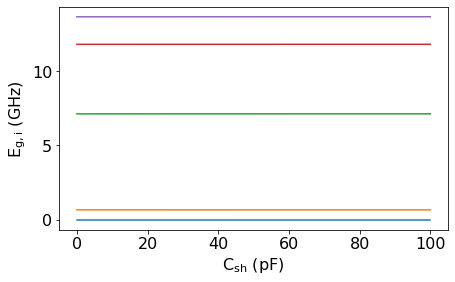

In [37]:
x,sweep_c,v = h.getSweep(sweep,'Csh',{})
for i in range(5):
    y = sweep_c[i] - sweep_c[0]
    plt.plot(x,y)
plt.xlabel("$C_{sh}$ (pF)")
plt.ylabel("$E_{g,i}$ (GHz)")